In [1]:

#train(model,loss_func,X,y,epochs=1000,batch_size = 32,lr=0.001):
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from dynamic_architect import Neural_Network
from data.generate import generate_circle_data 
from layers import Linear 
from activations import ReLU , Sigmoid
from losses import BCE 
from train_loop import train 
import numpy as np
def Predict(X,model): 
    A = X 
    for layer in model: 
        A = layer.forward(A) 
    return A
train_accs = []
test_accs = []



for seed in range(10):
    
    np.set_printoptions(suppress=True) 
    depth2 = Neural_Network([2,16,16,1]) 
    model = depth2.layers 
    X,y =  generate_circle_data(2000,0.5,seed) #chỗ này có seed
    loss_func = BCE()
    loss_history = train(model,loss_func,X,y,1000,32,0.001) 
    
    
    
    #tính độ chính xác quá trình huấn luyện 
    y_hat = Predict(X,model) 
    y_pred = (y_hat > 0.5).astype(int)
    training_accuracy = np.mean(y_pred == y)
    
    #tính độ chính xác quá trình dự đoán
    X_test,y_test =  generate_circle_data(400,0.5,seed+100)
    y_hat_test = Predict(X_test,model)
    y_pred_test = (y_hat_test > 0.5).astype(int)
    testing_accuracy = np.mean(y_pred_test == y_test)
    
    train_accs.append(training_accuracy)
    test_accs.append(testing_accuracy)

print(f"TRAIN acc: {np.mean(train_accs):.4f} ± {np.std(train_accs):.4f}")
print(f"TEST  acc: {np.mean(test_accs):.4f} ± {np.std(test_accs):.4f}")



TRAIN acc: 0.9982 ± 0.0019
TEST  acc: 0.9938 ± 0.0030


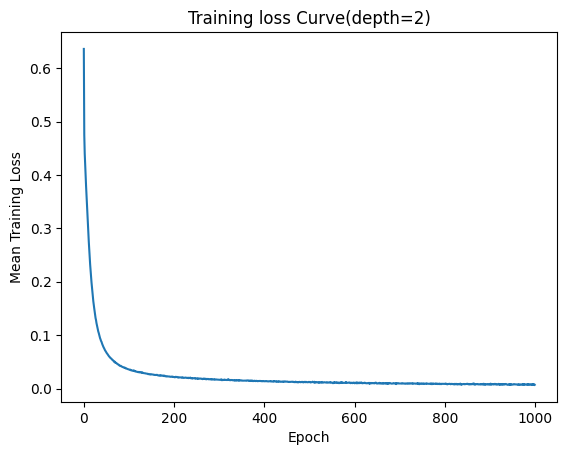

In [2]:
batch_per_epoch = int(np.ceil(len(X) / 32))
epoch_loss = [
    np.mean(loss_history[i*batch_per_epoch:(i+1)*batch_per_epoch])
    for i in range(1000)
]
import matplotlib.pyplot as plt 
plt.plot(epoch_loss)
plt.xlabel("Epoch")
plt.ylabel("Mean Training Loss") 
plt.title("Training loss Curve(depth=2)")
plt.show()


In [3]:
last_100 = epoch_loss[900:]
for i in range(0,100,10): 
    print(" ".join(f"{x:8.4f}" for x in last_100[i:i+10]))

  0.0073   0.0091   0.0088   0.0071   0.0084   0.0084   0.0082   0.0076   0.0083   0.0081
  0.0088   0.0077   0.0087   0.0080   0.0077   0.0072   0.0081   0.0079   0.0082   0.0088
  0.0073   0.0080   0.0072   0.0082   0.0082   0.0072   0.0077   0.0085   0.0072   0.0080
  0.0078   0.0083   0.0077   0.0084   0.0080   0.0086   0.0082   0.0076   0.0072   0.0069
  0.0074   0.0080   0.0083   0.0069   0.0077   0.0071   0.0082   0.0074   0.0079   0.0074
  0.0073   0.0076   0.0083   0.0081   0.0077   0.0081   0.0078   0.0077   0.0078   0.0077
  0.0072   0.0075   0.0078   0.0068   0.0076   0.0074   0.0068   0.0077   0.0075   0.0074
  0.0076   0.0081   0.0070   0.0077   0.0073   0.0085   0.0072   0.0080   0.0074   0.0076
  0.0075   0.0079   0.0072   0.0069   0.0084   0.0075   0.0071   0.0079   0.0075   0.0079
  0.0072   0.0075   0.0072   0.0080   0.0069   0.0083   0.0074   0.0071   0.0081   0.0070
